# $$Redes ~Neurais~Recorrentes:$$

### $$Conceito:$$




**Recurrent neural network (RNN):** É uma rede neural com “memória”, a cada iteração o neurônio memoriza uma parte da iteração anterior através do valor dos pesos, e quando maior o valor do peso, maior a informação guardada dos neurônios anteriores





Em mais detalhes, Redes Neurais Recorrentes são uma classe de redes neurais que recebe entrada de duas fontes: uma do presente, e outra de um ponto passado. A informação das duas fontes são utilizadas para decidir como reagir a uma nova entrada de dados, e isso é feito através de um circuito de feedback, onde a saída de cada instante é uma entrada para o instante seguinte. Devido a essa característica, podemos dizer que elas possuem memória, fazendo das RNRs mais semelhantes da forma como humanos processam informação, possibilitando o reconhecimento de um contexto através da memória





**RNN constrói distribuição de probabilidade**



-----------------------------------------------------------------------------------------------------------------------





### $$Caracteristicas~ do~ modelo~ RNN:$$



**Precisa ter 3 dimensões:**



- **1° Dimensão:** Size Sample(Tamanho das Amostras) - Quantidade de linhas que vou enviar para a rede neural 



- **2° Dimensão:** Time - Número de vezes que preciso mandar as amostras para completar meu dataset



- **3° Dimensão:** Quantidade de variáveis Explicativa do meu dataset



-----------------------------------------------------------------------------------------------------------------------



### $$Dissipação~ ou~ Explosão~ do~ gradiente:$$





**Backpropagation Through Time:** É o algoritmo de treinamento usado para atualizar pesos em redes neurais recorrentes de toda sua sequencia  ,então se as sequências de entrada forem compostas de milhares de passos de tempo, então este será o número de derivativos necessários para uma única atualização de peso. Isso pode fazer com que os pesos desapareçam ou explodam





**Dissipação do Gradiente:** Se o valor do neurônio da camada escondida for menor que 1, ao ser multiplicado por qualquer número, os neurônio mais antigos tende a ficar cada vez menor, podendo chegar a um valor insignificante de importância para o modelo, Inicialização de matriz de peso e a função de ativação ReLU pode resolver o problema









**Explosão do Gradiente:** Se o valor do neurônio da camada escondida for maior que 1, ao ser multiplicado por qualquer número, os neurônio mais antigos tende a ficar cada vez maior, gerando uma explosão do gradiente





**Backpropagation Truncada:** Consiste em parar a avaliação de mudanças de pesos até certo ponto, para que não haja dissipação e nem explosão do gradiente





**Clipping do Gradiente:** O clipping define um valor limite definido nos gradientes, o que significa que, mesmo se um gradiente aumentar além do valor predefinido durante o treinamento, seu valor ainda será limitado ao limite definido. Dessa forma, a direção do gradiente permanece inalterada e apenas a magnitude do gradiente é alterada



-----------------------------------------------------------------------------------------------------------------------











### $$Tipos~ De~ RNN:$$





**Rede de Elman:** Quanto mais antiga for sua camada escondida ela vai ser multiplicada por mais pesos, pois a cada nova iteração a camada escondida é multiplicada por algum valor de peso 



-----------------------------------------------------------------------------------------------------------------------





**Long Short-Term Memory(LSTM):** Seleciona as camadas ocultas do passado ou parte dela que serão relevantes para as camadas ocultas futuras(Estado da célula), as funções de ativação da LSTM são: Tanh, Sigmoid

- **Forget Gate** – Quanto lembrar de cada camada oculta antiga?

- **Input Gate** – Quanto manter dos inputs que está recebendo agora?

- **Output Gate** – O que do estado da célula e do hidden state será utilizado como resultado, de tudo que recebeu de informação, o que será relevante para determinar o resultado?



-----------------------------------------------------------------------------------------------------------------------





**Gate Recurrent Unit(GRU):** Igual à rede LSTM, porém só existe 2 gates: reinicialização e atualização

- **Reset Gate:** Quanto de informação anterior iremos ignorar

- **Update Gate:** Quanto de informação anterior iremos manter








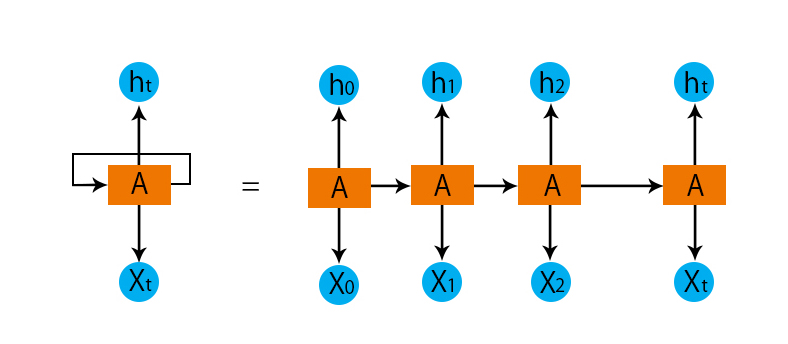

In [1]:
#RNN
from IPython.display import Image
Image(filename="RNN.jpg")

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$

## $$Prever~ a~ série~ temporal~ usando ~Redes ~Neurais~ Recorrentes$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [25]:
#Importar as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from time import time


#Pacotes para contrução da rede neural recorrente
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

## Carregando o dataset

In [3]:
dados = pd.read_csv('PETR4.SA.csv',encoding='latin1',sep=',')
dados['Date']=pd.to_datetime(dados['Date'])
dados = dados.set_index('Date')
dados = pd.DataFrame(dados['Open'])
dados

,Open
Date,
2021-01-14,29.170000
2021-01-15,29.049999
2021-01-18,28.309999
2021-01-19,28.480000
2021-01-20,28.950001
...,...
2022-01-10,27.990000
2022-01-11,28.100000
2022-01-12,28.950001


**Usaremos apenas a variável 'Open' para previsão da série**

# Análise Exploratória

In [9]:
#info dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-01-14 to 2022-01-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    249 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


**Variável do tipo numérica**

In [10]:
#Verificar os dados missing por coluna
dados.isnull().sum()

Open    0
dtype: int64

**Não há nenhum dado faltante no dataset**

In [11]:
#Describle
dados.describe()

,Open
count,249.000000
mean,26.851847
std,2.174830
min,21.299999
25%,25.799999
50%,27.320000
75%,28.660000
max,30.379999


**Não há grande variação nos dados**

# Modelo RNN

In [24]:
#Escalonar os dados 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dados_scaler = scaler.fit_transform(dados)
pd.Series(dados_scaler.ravel())

0      0.866740
1      0.853524
2      0.772026
3      0.790749
4      0.842511
         ...   
244    0.736784
245    0.748899
246    0.842511
247    0.906388
248    0.988987
Length: 249, dtype: float64

**Normalizar os dados, para que o treinamento da rede neural tenha uma melhor performance**

In [27]:
#Divisão dos dados
train = dados_scaler[:219]
test = dados_scaler[219:]


**Dividir os dados em treino e teste**

In [33]:
# Definir a 1° dimensão 
n_input = 3
generator_train = TimeseriesGenerator(train, train, length=n_input, batch_size=1)


**Definimos como 3 o número de observações que será enviado em sequência para prever a variável target**

In [34]:
#Visualizar a primeira sequencia 
X,Y = generator_train[0]
print(f'Variáveis preditoras: \n{X.flatten()}')
print(f'\nVariável Target: \n {Y}')

Variáveis preditoras: 
[0.8667402  0.85352423 0.77202643]

Variável Target: 
 [[0.79074901]]


**A primeira sequência de amostras que será enviada para previsão da variável target**

In [36]:
#Visualizar a segunda sequencia 
X,Y = generator_train[1]
print(f'Variáveis preditoras: \n{X.flatten()}')
print(f'\nVariável Target: \n {Y}')

Variáveis preditoras: 
[0.85352423 0.77202643 0.79074901]

Variável Target: 
 [[0.84251123]]


**Segunda sequência de amostras que será enviada para previsão da variável target**

**OBS: Note que a sequência enviada pela variável preditora é a cada 3, alterando apenas 1 dado da sequência anterior, portanto se na primeira sequência foi enviado os dados das linhas 1, 2, 3, a próxima sequência será enviado as linhas 2, 3, 4, e a variável target é sempre o a linha subsequente do último dado enviado daquela sequência**

## Modelo LSTM

In [37]:
# Modelo
n_input = 3
n_features = 1

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


**Criamos o modelo LSTM com 100 neurônios**

In [38]:
# Treinamento do modelo com 100 epocas
model.fit(generator_train,epochs=100)

Epoch 1/100
216/216 [==============================] - 2s 2ms/step - loss: 0.0543
Epoch 2/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 3/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 4/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 5/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 6/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 7/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 8/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 9/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 10/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 11/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 12/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 13/100


216/216 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 100/100
216/216 [==============================] - 0s 2ms/step - loss: 0.0058


**Treinamento do modelo com 100 épocas**

(0.0, 0.05)

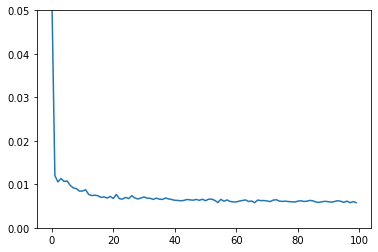

In [39]:
#Plot
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.ylim(0,0.05)

**Note que a partir da época 15 o modelo fica estático**

## Previsão dos dados de Treino

In [40]:
#Size dos dados da variável target de treino X previsão dos dados de treino
size_model_train = len(model.predict(generator_train))
size_train = len(train)

print(f'Linhas dados de treino: {size_train}')
print(f'Linhas do modelo dados de treino: {size_model_train}')

216/216 [==============================] - 0s 1ms/step
Linhas dados de treino: 219
Linhas do modelo dados de treino: 216


**Note que para previsão do modelo, precisamos começar utilizando as 3 primeiras linhas do dataset de treino, por isso que o shape dos dados de treino e da previsão do modelo tem diferença de 3 dados**

In [41]:
#Criar um dataset dos dados de treino
prev_treino = pd.DataFrame(train,columns=['Y'])[3:]
prev_treino

,Y
3,0.790749
4,0.842511
5,0.740088
6,0.620044
7,0.655286
...,...
214,0.853524
215,0.780837
216,0.887665
217,0.881057


**Como a variável Y nos dados de treino começa a partir da 4 linha, excluímos as 3 primeiras linhas para conseguir comparar com a previsão do modelo de treino**

In [42]:
#Previsão
prev_treino['Previsao'] = model.predict(generator_train)
prev_treino

216/216 [==============================] - 0s 1ms/step


,Y,Previsao
3,0.790749,0.740938
4,0.842511,0.767474
5,0.740088,0.782922
6,0.620044,0.696751
7,0.655286,0.620130
...,...,...
214,0.853524,0.685505
215,0.780837,0.768895
216,0.887665,0.721062
217,0.881057,0.823727


**Variável target representada pela coluna 'Y' e a previsão pela coluna 'Previsao'**

In [44]:
#Metricas dos dados de treino
from sklearn.metrics import r2_score, mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error


target_treino = prev_treino.Y
previsao_treino = prev_treino.Previsao


print('Erro médio absoluto :', mean_absolute_error(previsao_treino,target_treino))
print('Erro médio quadrado logarítmico :', mean_squared_log_error(previsao_treino,target_treino))
print('Erro medio quadrado :', mean_squared_error(previsao_treino,target_treino))
print('Coeficiente de determinação (R²):', r2_score(target_treino,previsao_treino))

Erro médio absoluto : 0.058141793883711594
Erro médio quadrado logarítmico : 0.0025506646053884943
Erro medio quadrado : 0.006001905786396071
Coeficiente de determinação (R²): 0.8940834826561199


**Resultado das métricas dos dados de Treino**

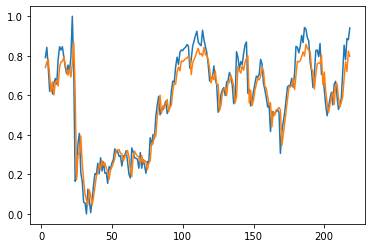

In [45]:
#Plot
plt.plot(target_treino)
plt.plot(previsao_treino)

**Note que o modelo teve um bom desempenho com os dados de treino**

## Previsão dados de Teste

In [46]:
# Definir a 1° dimensão dos dados de teste
n_input = 3 #Os dados irá ser enviado na sequencia de 3 em 3 
n_features = 1
generator_test = TimeseriesGenerator(test, test, length=n_input, batch_size=1)


**Os dados irão ser enviado na sequência a cada 3, assim como nos dados de treino**

In [60]:
#Dados de teste
X,Y = generator_test[0]
print(f'Variáveis preditoras: \n{X.flatten()}')
print(f'\nVariável Target: \n {Y}')

Variáveis preditoras: 
[0.62665209 0.79074901 0.82378877]

Variável Target: 
 [[0.87885485]]


**Primeira linha do dataset dos dados de teste**

In [54]:
#Criar um dataset dos dados de treino
prev_teste = pd.DataFrame(test,columns=['Y'])[3:]
prev_teste.head()

,Y
3,0.878855
4,0.887665
5,0.859031
6,0.903084
7,0.921806


**Assim como nos dados de treino, a variável Y começa a partir da 4 linha, excluímos as 3 primeiras linhas para conseguir comparar com a previsão do modelo de treino**

In [55]:
#Previsão
prev_teste['Previsao'] = model.predict(generator_test)
prev_teste

27/27 [==============================] - 0s 1ms/step


,Y,Previsao
3,0.878855,0.751473
4,0.887665,0.804273
5,0.859031,0.809370
6,0.903084,0.801555
7,0.921806,0.831998
8,0.915198,0.832912
9,0.859031,0.835043
10,0.916300,0.806123
11,0.883260,0.845054
12,0.786344,0.808761


**Variável target representada pela coluna 'Y' e a previsão pela coluna 'Previsao'**

In [73]:
#Métricas dos dados de treino

target_teste = prev_teste.Y
previsao_teste = prev_teste.Previsao


print('Erro médio absoluto :', mean_absolute_error(previsao_teste,target_teste))
print('Erro médio quadrado logarítmico :', mean_squared_log_error(previsao_teste,target_teste))
print('Erro medio quadrado :', mean_squared_error(previsao_teste,target_teste))
print('Coeficiente de determinação (R²):', r2_score(target_teste,previsao_teste))

Erro médio absoluto : 0.06259711752720533
Erro médio quadrado logarítmico : 0.0017386636953403418
Erro medio quadrado : 0.005895706472266909
Coeficiente de determinação (R²): -0.4519383805463877


**Resultado das métricas dos dados de teste**

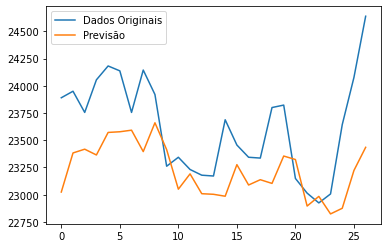

In [80]:
#Plot

#Transformar os dados na escala original
previsao_teste = scaler.inverse_transform(np.array(previsao_teste,ndmin=2))
target_teste = scaler.inverse_transform(np.array(target_teste,ndmin=2))

#Comparar as series temporais
plt.plot(target_teste[0]);
plt.plot(previsao_teste[0]);
plt.legend(['Dados Originais','Previsão']);

**Os dados de teste não conseguiu ter uma boa performance, são raros os pontos onde há igualdade entre os dados**

# Conclusão:

**Nesse mini-projeto foi possível utilizar técnicas de redes neurais recorrentes para prever o valor de fechamento futuro de ações do mercado financeiro, usamos o algoritmo Long Short-Term Memory (LSTM), os dados de previsão não tiveram grandes resultados, poderíamos ter utilizado o algoritmo de otimização de hiperparâmetros para ter resultados diferentes, porém para ter conhecimento do algoritmo, os dados apresentados foram o suficiente**